In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

# Sample data dictionary (replace this with your actual data)

llm = '7b_org'

data = pickle.load(open(os.path.join("../", llm+"_results.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

<class 'dict'>
dict_keys(['IR_prison', 'IR_delight', 'IR_staghunt', 'IR_snowdrift', 'biz_prison', 'biz_delight', 'biz_staghunt', 'biz_snowdrift', 'friendsharing_prison', 'friendsharing_delight', 'friendsharing_staghunt', 'friendsharing_snowdrift', 'environment_prison', 'environment_delight', 'environment_staghunt', 'environment_snowdrift', 'team_prison', 'team_delight', 'team_staghunt', 'team_snowdrift'])


In [58]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        if item != '  C' and item != '  D':
            print(key, item)

In [59]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)

# save the distribution to a .txt file
with open(os.path.join("../", llm+"_distribution.txt"), "x") as f:
    for key in distribution.keys():
        # write each line like this: key: {item1: count1, item2: count2}
        f.write(key + ': ' + str(distribution[key]) + '\n')

print('Distribution saved to ' + llm + '_distribution.txt')

FileExistsError: [Errno 17] File exists: '../7b_org_distribution.txt'

In [78]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# read the distribution from the .txt file
distribution = read_distribution(os.path.join("../", llm+"_distribution.txt"))

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b_org', '7b_finetuned', '70b']
for llm in llms:
    distribution = read_distribution(os.path.join("../", llm+"_distribution.txt"))
    all_data[llm] = distribution
    
# save the all_data dictionary to a .txt file
with open(os.path.join("../", "all_data.txt"), "w") as f:
    f.write(str(all_data))
    
print('All data saved to all_data.txt')

# save to a .pkl file
pickle.dump(all_data, open(os.path.join("../", "all_data.pkl"), "wb"))

print('All data saved to all_data.pkl')

All data saved to all_data.txt
All data saved to all_data.pkl


In [ ]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.3, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
compare_distribution(all_data, keys)

In [163]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[0]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'IR': ['IR_prison', 'IR_delight', 'IR_staghunt', 'IR_snowdrift'],
             'biz': ['biz_prison',
              'biz_delight',
              'biz_staghunt',
              'biz_snowdrift'],
             'friendsharing': ['friendsharing_prison',
              'friendsharing_delight',
              'friendsharing_staghunt',
              'friendsharing_snowdrift'],
             'environment': ['environment_prison',
              'environment_delight',
              'environment_staghunt',
              'environment_snowdrift'],
             'team': ['team_prison',
              'team_delight',
              'team_staghunt',
              'team_snowdrift']})

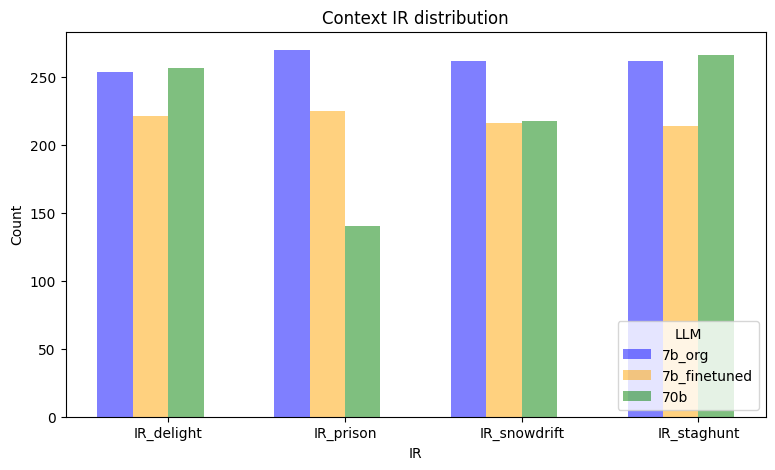

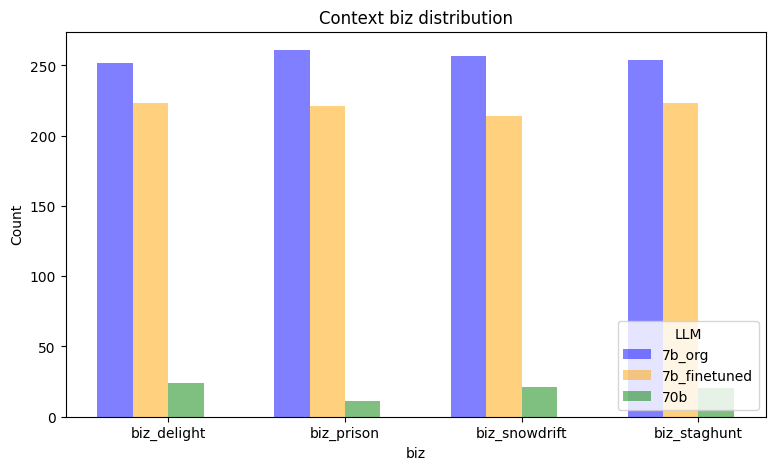

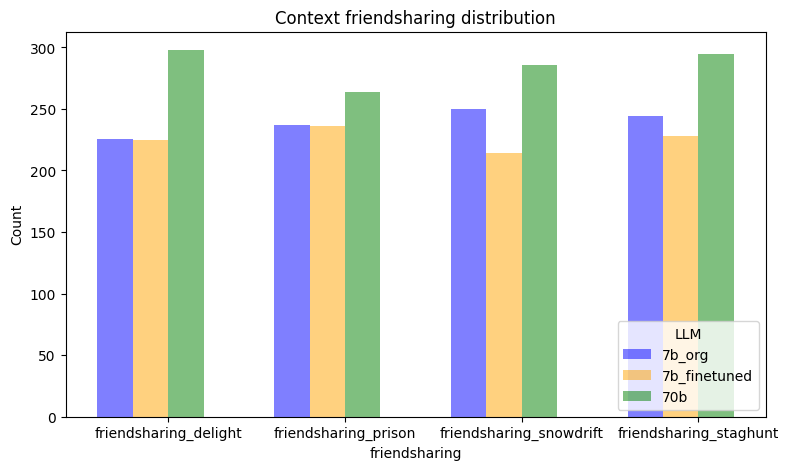

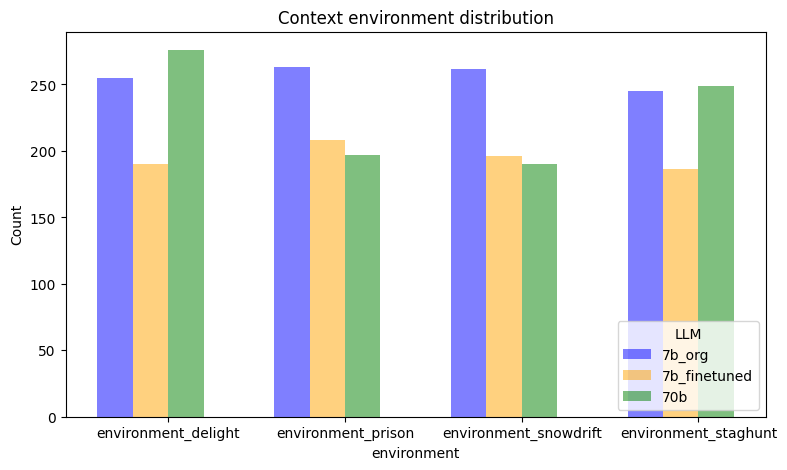

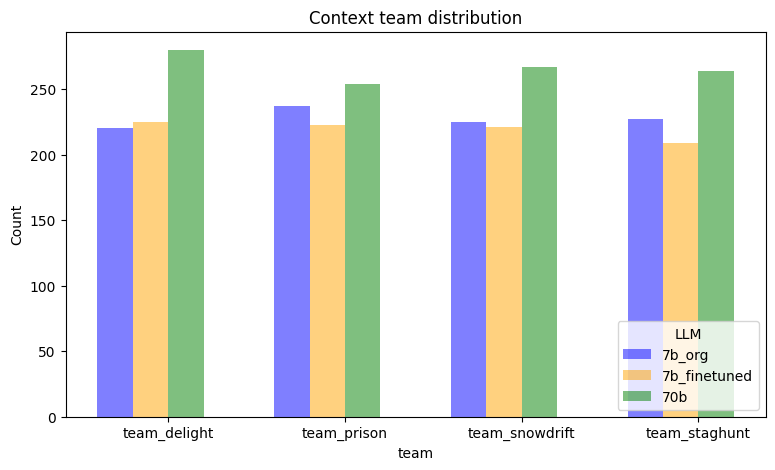

In [165]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(8, 5))
    bar_width = 0.2
    llm_colors = {'7b_org': 'blue', '7b_finetuned': 'orange', '70b': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            plt.bar(x[i], distribution[game]['  C'], width=bar_width, alpha=0.5, label=game, color=color)
            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
        
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 2 for pos in range(len(valid_games))], valid_games)
    plt.xlabel(category)
    plt.ylabel('Count')
    plt.title(f'{category_type} {category} distribution')
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    plt.subplots_adjust(right=1)  # Increase the right margin to accommodate the legend    
    # save plot
    if category_type == 'Context':
        plt.savefig(os.path.join("../figs/context", category + '_distribution.png'))
    else:
        plt.savefig(os.path.join("../figs/game", category + '_distribution.png'))
    # plt.show()


for category in categorized_keys:
    aggregated_comparison_by_category(all_data, category, category_type='Context')

